In [1]:
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [6]:
img = mnist.train.images[0].reshape(28,28)

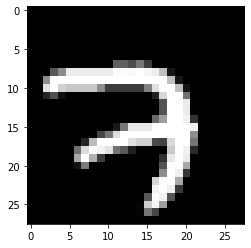

In [7]:
plt.imshow(img, cmap='gray')

In [8]:
sess = tf.InteractiveSession()

In [9]:
img = img.reshape(-1, 28, 28, 1)

In [10]:
W1 = tf.Variable(tf.random_normal(shape=[3, 3, 1, 5], stddev=0.01), name='weight1') #width, height, color, filterN

In [11]:
conv2d = tf.nn.conv2d(img, W1, strides=[1, 2, 2, 1], padding='SAME')

In [12]:
print(conv2d)

Tensor("Conv2D:0", shape=(1, 14, 14, 5), dtype=float32)


In [13]:
sess.run(tf.global_variables_initializer())

In [14]:
conv2d_img = conv2d.eval()

In [15]:
print(conv2d_img.shape)

(1, 14, 14, 5)


In [16]:
conv2d_img = np.swapaxes(conv2d_img, 0, 3)

In [17]:
print(conv2d_img.shape)

(5, 14, 14, 1)


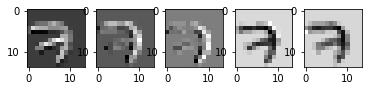

In [19]:
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1, 5, i + 1), plt.imshow(one_img.reshape(14,14), cmap='gray')

In [20]:
pool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [21]:
print(pool)

Tensor("MaxPool:0", shape=(1, 7, 7, 5), dtype=float32)


In [22]:
pool_img = pool.eval()

In [23]:
pool_img = np.swapaxes(pool_img, 0, 3)

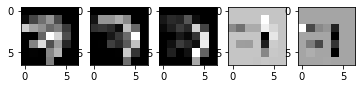

In [25]:
for i, one_img in enumerate(pool_img):
    plt.subplot(1, 5, i + 1), plt.imshow(one_img.reshape(7,7), cmap='gray')